# Prueba final en los conjuntos de datos de prueba

Luego de seleccionar el modelo que consideramos **óptimo** para los objetivos de nuestro proyecto, nos embarcamos en la última fase: **evaluar su rendimiento con datos de prueba**. Esta etapa implica poner a prueba nuestro modelo utilizando los conjuntos de datos reservados para cada jugador desde el inicio del proyecto con este propósito específico.

Empezamos por generar las predicciones para todo el conjunto de test:

In [ ]:
#Guardo y_test para evaluaciones futuras
y_test = df_data_jugadores_test.loc[:, ['mvp_share']]

#Preproceso las variables X de test
X_test = df_data_jugadores_test.loc[:, correlated_features]
X_test_prepared = pip.transform(X_test)

#Tomo el modelo y hago las predicciones en test
y_test_pred = forest_reg_best.predict(X_test_prepared)

Ahora, al igual que hicimos con los datos de entrenamiento, vamos a evaluar las métricas de este modelo para el dataset de prueba:

In [ ]:
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("Métricas en el conjunto de entrenamiento:")
print(f"Coeficiente de determinación (R²): {r2_test:.4f}")
print(f"Varianza explicada: {explained_variance_test:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_test:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_test:.4f}")

De estas métricas, podemos apreciar que, aunque no logró un rendimiento tan cercano al obtenido con los datos de entrenamiento (lo cual es común), aún mantenemos **métricas bastante razonables**. Esto indica que nuestro modelo no ha caído en un **caso de subajuste** y sugiere que puede alcanzar un rendimiento aceptable al evaluarlo con otras métricas.

Ahora procedemos a ver gráficamente como se comparan las predicciones de nuestro modelo respecto del valor real que toma la variable **'mvp_share'**:

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test_pred, y=y_test, scatter_kws={'color': '#ff7f0e'}, line_kws={'color': 'blue', 'linewidth': 2})
plt.xlabel('y_test (Valores Reales)', fontsize=14)
plt.ylabel('y_test_pred (Predicciones)', fontsize=14)
plt.title('Comparación: Valores de datos de prueba vs Predicción del modelo', fontsize=18)

De este gráfico, podemos observar que las predicciones generadas por nuestro modelo están algo más dispersas en comparación con la línea azul de regresión. Además, notamos que, para valores altos de **'y_test'**, la variabilidad de los datos aumenta, lo cual podría conducir a algunas sorpresas al momento de presentar los podios predichos por nuestro modelo. A pesar de esto, hay que resaltar que nuestro modelo ha logrado mantener la tendencia general de los datos.

Ahora como evaluación final, vamos a ver que tan bien nuestro modelo logra pocisionar a los jugadores reservados para la prueba para así luego sacar nuestras conclusiones sobre lo obtenido:

In [ ]:
mostrar_podio_MVP(temporada = 2022, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 5)

In [ ]:
mostrar_podio_MVP(temporada = 2023, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 5)

Lo primero que destaca es la persistencia de diferencias entre el valor de **'mvp_share'** predicho por el modelo y el valor real, más notablemente en casos recientes, como con **Joel Embiid en 2023**, donde la diferencia es de 0**.915 (valor real) a 0.425585 (predicho por el modelo)**. Esta disparidad coincide con las observaciones del gráfico anterior, donde notamos un aumento significativo en la variabilidad de las predicciones para valores altos de **'mvp_share'**.

A pesar de esto, nos complace observar que nuestro modelo **identificó correctamente al ganador** en cada uno de los años seleccionados, cumpliendo así con el **objetivo fundamental** para el cual fue desarrollado. A continuación, presentamos nuevamente una representación visual con los últimos ganadores del premio para que puedan corroborar esta información:

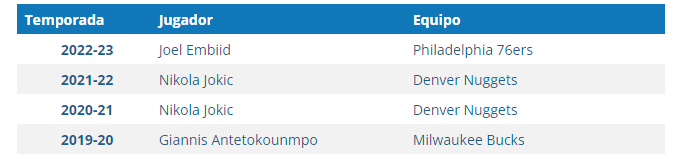

## Entendiendo el modelo

Para concluir, también deseamos abordar algunos **casos particulares** que se presentaron en los posicionamientos generados por el modelo, los cuales se mostraron anteriormente. Estos casos involucran a jugadores que fueron incluidos entre los cinco principales votados cuando, en realidad, no estuvieron allí, y a jugadores que no fueron incluidos pero que sí estaban presentes (en 2022 y 2023). Específicamente, estos jugadores son:

*   **LeBron James** - **Devin Booker** (2022)
*   **Luka Dončić** - **Jayson Tatum** (2023)

En el caso de **LeBron James**, tenemos que según nuestro modelo en la temporada 2022 este mismo ocupaba la quinta posición del podio, cosa que realmente no fue así (se puede verificar su posición real [aquí](https://es.wikipedia.org/wiki/Anexo:Votaci%C3%B3n_del_MVP_de_la_NBA_2021-22)). A continuación mostramos una imagen del podio real para ganar el premio:

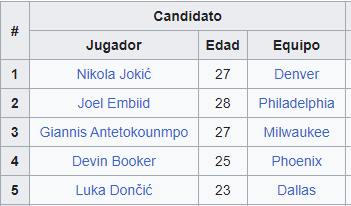

Observamos que en la posición que solía ocupar **LeBron James**, se encuentra **Luka Dončić**, a quien nuestro modelo colocó en la cuarta posición. También observamos el caso de **Devin Booker**, quien **no estaba** en el podio predicho por nuestro modelo. Esto sugiere que, aunque nuestro modelo identifica correctamente al ganador del premio, enfrenta desafíos al posicionar jugadores en **lugares inferiores**.

Si observamos donde quedó **Devin Booker** según nuestro modelo para esta temporada, nos daremos cuenta que obtuvo una posición bastante baja:

In [ ]:
mostrar_podio_MVP(temporada = 2022, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 11)

Una posible explicación para esta situación sería lo contrario a lo que ocurre con otros jugadores que se encuentran en equipos menos destacados: **Devin Booker** estuvo rodeado de más estrellas, por lo tanto, no lideró las estadísticas de su equipo. Con esto, comenzamos a observar cómo la situación del equipo **influyó considerablemente** en la votación.

Al retroceder un poco hacia **LeBron James**, nos planteamos la pregunta de **por qué el modelo lo situó en esa posición**. Este resultado no fue aleatorio; tiene sus raíces en un aspecto que mencionamos al inicio de nuestro proyecto al definir nuestros objetivos: el intento de descubrir **qué significa realmente ser el jugador más valioso** para un equipo. Resulta que en ese año, **LeBron James** jugaba para los **Los Angeles Lakers**, siendo el **jugador más determinante** de la plantilla y liderando su equipo en prácticamente todas las estadísticas. A continuación, presentamos una imagen que muestra a los líderes ofensivos de la NBA para el año 2022:

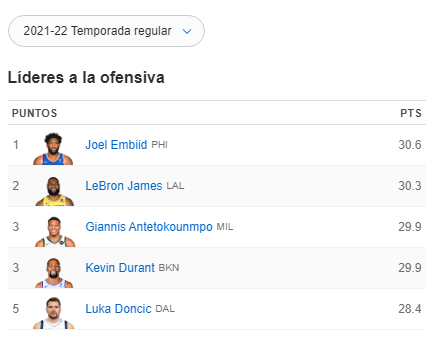

Aunque la faceta ofensiva representa solo uno de los numerosos aspectos en el juego del baloncesto, es innegable que los partidos se ganan al anotar puntos, y en la temporada 2022, **LeBron James** se destacó en esta habilidad, convirtiéndolo en el **jugador más valioso** para su equipo. Sin embargo, la razón por la cual no recibió tantos votos está vinculada a consideraciones narrativas y a la percepción de **LeBron James** como un jugador de avanzada edad para los estándares de la liga (38 años en ese momento). Esto subraya la **subjetividad** inherente a este premio, demostrando que en algunos casos no solo las estadísticas son determinantes.

Luego está el caso de **Luka Dončić** que según nuestro modelo en la temporada 2023 este último ocupaba la tercera posición del podio, cosa que realmente no fue así (se puede ver su posición real [aquí](https://es.wikipedia.org/wiki/Anexo:Votaci%C3%B3n_del_MVP_de_la_NBA_2022-23)). A continuación mostramos una imagen del podio real para ganar el premio:

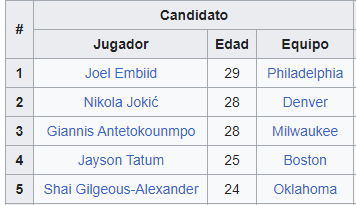

Podemos notar varias cosas, como que nuestro modelo posicionó a **Luka Dončić** por encima de **Giannis Antetokounmpo** o que el jugador **Jayson Tatum** directamente no entró al podio. Estas cosas ya las sabemos con anterioridad cuando mencionamos que nuestro modelo tiene problema para colocar a jugadores en puestos inferiores.


Al cuestionar la posición que **Jayson Tatum** ocupó según nuestro modelo, nos encontramos con un caso menos extremo que el de **Devin Booker**, ya que Tatum se ubicó en la **séptima posición** de la tabla, no tan distante del podio:

In [ ]:
mostrar_podio_MVP(temporada = 2023, y_pred = y_test_pred, df_base = df_data_jugadores_test, cant_jugadores = 7)

La explicación para esto sería relativamente similar a la de **Devin Booker**: **Jayson Tatum** jugó en **Boston Celtics** durante la temporada 2023, un equipo con una plantilla sólida, situación que hizo que él individualmente **no fuera lider** en tantas estadísticas. Podemos afirmar que el hecho de que entre las variables predictoras que utilizamos para entrenar nuestro modelo no se encuentre ninguna que aporte alguna métrica sobre el **rendimiento del equipo** en el que estuvo el jugador afectó significativamente las predicciones.

De vuelta, volviendo a **Luka Dončić** tenemos un caso similar a **LeBron James**, un jugador el cual era el más valioso para su equipo (**Dallas Mavericks**) en la temporada 2022 y fue lider en numerosas estadísticas. A continuación dejamos una imagen que muestra dos aspectos en los cuales **Dončić** estuvo entre los más destacados de la liga:

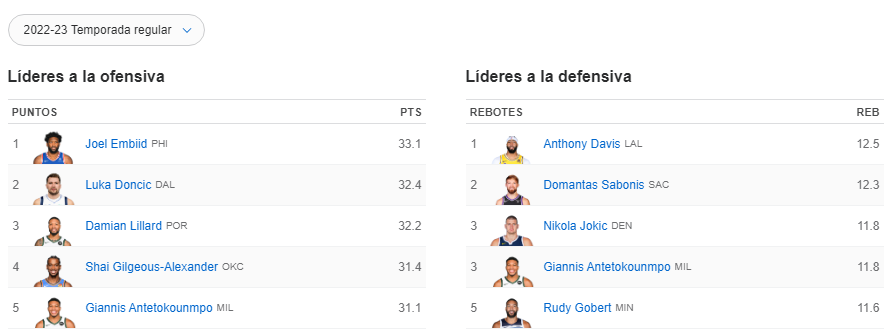

Nos encontramos ante el caso de un jugador con una notable capacidad tanto en el aspecto ofensivo como defensivo, aspectos que, aunque no son la totalidad del baloncesto, indudablemente desempeñan roles determinantes en el juego. Al considerar el motivo por el cual no recibió tantos votos, surge una situación que podría justificarlo: su equipo, los **Dallas Mavericks**, finalizó la temporada regular en una **posición bastante baja** (se puede verificar [aquí](https://www.espn.com.ar/basquetbol/nba/posiciones/_/temporada/2023)). En general, el premio MVP rara vez se otorga a jugadores cuyos equipos han concluido la temporada en posiciones desfavorables, presentando así otro ejemplo en el que, a pesar de las estadísticas que indican una gran influencia individual, **la realidad del desempeño del equipo puede afectar la percepción del jugador en la carrera por el MVP**.

En términos generales, estamos satisfechos con los logros obtenidos por nuestro modelo y la comprensión que nos brindó sobre el premio MVP. Al ponerlo a prueba con los datos de prueba, exploramos diversos aspectos y desafíos que enfrentó nuestro modelo, llegando a la conclusión de la marcada subjetividad del premio. Se hizo evidente que las estadísticas positivas no siempre son el único factor determinante en la valoración de un jugador, y que la narrativa de cada temporada ejerce una influencia significativa.

Ahora que hemos completado nuestro trabajo, sin más que agregar, ¡gracias por haberlo revisado!.